In [ ]:
#import library
import pandas as pd
import numpy as np
import nltk
import string
import re
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def load_data():
  data = pd.read_excel('/content/dataclean.xlsx')
  return data
# Dataset dimuat dari file Excel dataclean.xlsx.
# Dataset sudah mengalami proses cleaning dan preprocessing

In [ ]:
tweet_df = load_data()

In [ ]:
tweet_df.head()

,Unnamed: 0,Kategori,Sentimen,lower,h_angka,tokenizing,filtering,tweet_clean
0,0,netral,"Komisi Pemilihan Umum, Sabtu (19/8/2023), memp...","komisi pemilihan umum, sabtu (19/8/2023), memp...",komisi pemilihan umum sabtu memperbarui daftar...,"['komisi', 'pemilihan', 'umum', 'sabtu', 'memp...",komisi pemilihan um sabtu memperbarui daftar c...,komisi pilih um sabtu baru daftar calon sement...
1,1,netral,"Targetkan Enam Kursi di Pemilu 2024, Ketua DPC...","targetkan enam kursi di pemilu 2024, ketua dpc...",targetkan enam kursi di pemilu ketua dpc pdip ...,"['targetkan', 'enam', 'kursi', 'di', 'pemilu',...",targetkan enam kursi di pemilu ketua dpc pdip ...,target enam kursi di milu ketua dpc pdip sarol...
2,2,positif,Presiden 2024 hanya Ganjar PranowoTerbaik !! y...,presiden 2024 hanya ganjar pranowoterbaik !! y...,presiden hanya ganjar pranowoterbaik yang lain...,"['presiden', 'hanya', 'ganjar', 'pranowoterbai...",presiden hanya ganjar pranowoterbaik yang lain...,presiden hanya ganjar pranowoterbaik yang lai ...
3,3,netral,"kontestasi berharap cawapres"" versus ""kandidat...","kontestasi berharap cawapres"" versus ""kandidat...",kontestasi berharap cawapres versus kandidat c...,"['kontestasi', 'berharap', 'cawapres', 'versus...",kontestasi berharap cawapres versus kandidat c...,kontestasi harap cawapres versus kandidat cawa...
4,4,netral,"*Minggu Kasih Kapolres Tabanan, Ajak Jemaat Su...","*minggu kasih kapolres tabanan, ajak jemaat su...",minggu kasih kapolres tabanan ajak jemaat suk...,"['minggu', 'kasih', 'kapolres', 'tabanan', 'aj...",mingu kasih kapolres taban ajak jemat sukseska...,mingu kasih kapolres taban ajak jemat sukses m...


In [ ]:
df = pd.DataFrame(tweet_df[['Kategori','tweet_clean']])

In [ ]:
# Menampilkan jumlah data untuk tiap kategori pada kolom 'Kategori' di dataframe df
df['Kategori'].value_counts()

,count
Kategori,
netral,1657
positif,1254
negatif,560


Text(0.5, 1.0, 'Dataset dan Labeling')

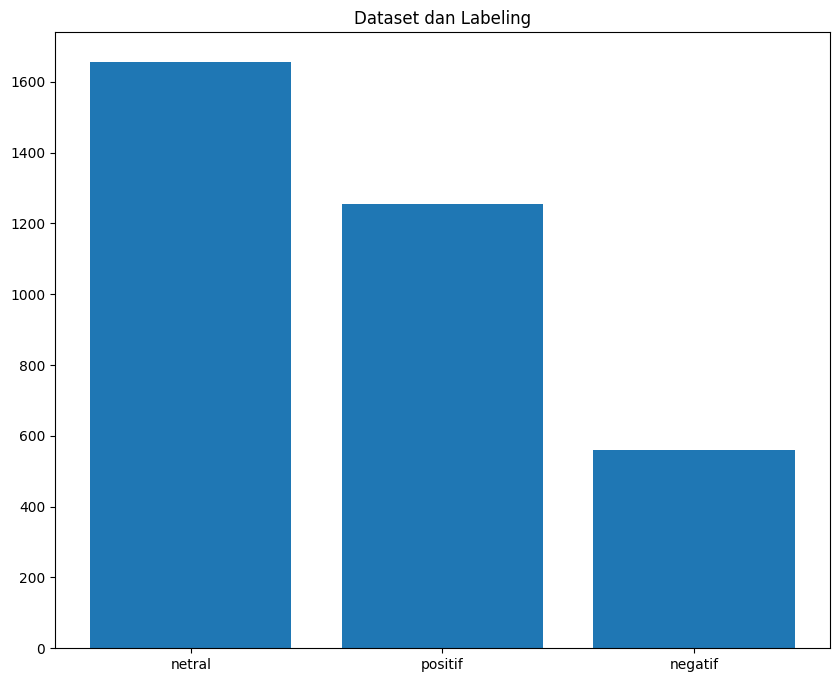

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Menghitung jumlah masing-masing kategori di kolom 'Kategori'
label_cnt = Counter(df['Kategori'])

# Mengatur ukuran figure untuk plot
plt.figure(figsize=(10,8))

# Membuat diagram batang (bar chart) dari jumlah masing-masing label
plt.bar(label_cnt.keys(), label_cnt.values())

# Menambahkan judul grafik
plt.title("Dataset dan Labeling")


In [ ]:
# Menghapus kolom 'Kategori' dari dataframe df untuk dijadikan data fitur X
X = df.drop(['Kategori'], axis=1)

# Menyimpan kolom 'Kategori' sebagai data label y
y = df['Kategori']

In [ ]:
# Menyimpan seluruh dataframe ke variabel X
X=df

# Menyimpan kolom 'Kategori' sebagai data label Y
Y=df['Kategori']

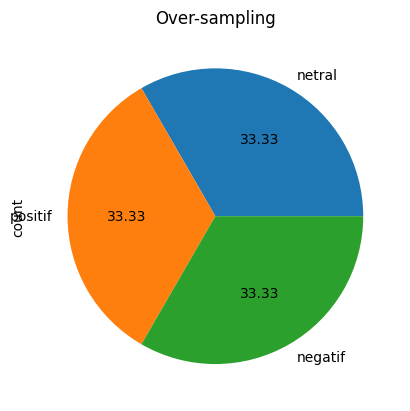

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Membuat objek RandomOverSampler dengan strategi over-sampling
ros = RandomOverSampler(sampling_strategy="not majority")

# Melakukan over-sampling pada dataset X dan Y
X_res, y_res = ros.fit_resample(X, Y)

# Membuat pie chart dari hasil over-sampling
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")



In [ ]:
# Menampilkan jumlah data untuk tiap kategori pada data hasil over-sampling
y_res.value_counts()

,count
Kategori,
netral,1657
positif,1657
negatif,1657


In [ ]:
# Menyimpan hasil resampling ke dalam variabel df
df = X_res

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer().fit(df['tweet_clean'].values.astype('U'))
# Membuat objek CountVectorizer untuk mengubah teks menjadi representasi angka (BoW)
# Memasukkan data dari kolom 'tweet_clean', mengkonversi tipe data ke Unicode string (U)

#Menampilkan daftar kata (vocabulary) yang dihasilkan dari data
bow_transformer.vocabulary_

{'komisi': 3093,
 'pilih': 4796,
 'um': 6713,
 'sabtu': 5492,
 'baru': 601,
 'daftar': 1212,
 'calon': 1024,
 'sementara': 5740,
 'milu': 3919,
 'legislatif': 3428,
 'sebab': 5656,
 'temu': 6394,
 'salah': 5523,
 'gegara': 1865,
 'kelai': 2878,
 'manusia': 3670,
 'tajukrencana': 6244,
 'adikompas': 57,
 'target': 6314,
 'enam': 1608,
 'kursi': 3322,
 'di': 1338,
 'ketua': 2989,
 'dpc': 1484,
 'pdip': 4577,
 'sarolangun': 5597,
 'sebut': 5663,
 'semua': 5745,
 'sudah': 6097,
 'gerak': 1899,
 'presiden': 5047,
 'hanya': 2074,
 'ganjar': 1800,
 'pranowoterbaik': 5039,
 'yang': 6951,
 'lai': 3348,
 'masalah': 3704,
 'ganjarhebat': 1812,
 'ganjarpresidenku': 1829,
 'indonesiamaju': 2324,
 'persatuanrakyatdanumat': 4740,
 'kontestasi': 3157,
 'harap': 2079,
 'cawapres': 1060,
 'versus': 6796,
 'kandidat': 2737,
 'bagaimana': 489,
 'resepsi': 5354,
 'gen': 1882,
 'mingu': 3925,
 'kasih': 2798,
 'kapolres': 2757,
 'taban': 6226,
 'ajak': 121,
 'jemat': 2542,
 'sukses': 6130,
 'agustus': 93,
 '

In [ ]:
# Mengubah data teks pada kolom 'tweet_clean' menjadi representasi numerik menggunakan BoW
text_bow = bow_transformer.transform(df['tweet_clean'].values.astype('U'))

# Menampilkan hasil transformasi BoW
print(text_bow)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 93041 stored elements and shape (4971, 7011)>
  Coords	Values
  (0, 57)	1
  (0, 601)	1
  (0, 1024)	1
  (0, 1212)	1
  (0, 1865)	1
  (0, 2878)	1
  (0, 3093)	1
  (0, 3428)	1
  (0, 3670)	1
  (0, 3919)	1
  (0, 4796)	1
  (0, 5492)	1
  (0, 5523)	1
  (0, 5656)	1
  (0, 5740)	1
  (0, 6244)	1
  (0, 6394)	1
  (0, 6713)	1
  (1, 1338)	1
  (1, 1484)	1
  (1, 1608)	1
  (1, 1899)	1
  (1, 2989)	1
  (1, 3322)	1
  (1, 3919)	1
  :	:
  (4969, 3619)	1
  (4969, 3701)	1
  (4969, 3820)	1
  (4969, 3919)	1
  (4969, 3962)	1
  (4969, 4804)	1
  (4969, 4945)	1
  (4969, 5007)	1
  (4969, 6130)	1
  (4969, 6364)	1
  (4969, 6443)	1
  (4969, 6474)	1
  (4969, 6657)	1
  (4970, 1231)	1
  (4970, 1800)	1
  (4970, 1812)	1
  (4970, 1829)	1
  (4970, 2323)	2
  (4970, 2324)	1
  (4970, 3608)	1
  (4970, 3919)	1
  (4970, 5038)	1
  (4970, 5047)	1
  (4970, 5538)	1
  (4970, 5681)	1


In [ ]:
# Mengubah sparse matrix hasil BoW menjadi array numpy biasa
X = text_bow.toarray()
print(X)

# Menampilkan ukuran shape dari array
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(4971, 7011)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

# Membuat dan melatih objek TF-IDF Transformer berdasarkan data BoW
tfidf_transformer=TfidfTransformer().fit(text_bow)

# Menampilkan objek TF-IDF
print(tfidf_transformer)

# Mengubah data BoW menjadi representasi TF-IDF
tweet_tfidf=tfidf_transformer.transform(text_bow)

# Menampilkan hasil transformasi TF-IDF yang masih dalam bentuk sparse matrix
print(tweet_tfidf)

# Menampilkan ukuran hasil transformasi
print(tweet_tfidf.shape)

TfidfTransformer()
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 93041 stored elements and shape (4971, 7011)>
  Coords	Values
  (0, 57)	0.23816001374572748
  (0, 601)	0.19896849070590614
  (0, 1024)	0.16520408841823608
  (0, 1212)	0.19323283004472494
  (0, 1865)	0.32790626373820214
  (0, 2878)	0.32790626373820214
  (0, 3093)	0.23816001374572748
  (0, 3428)	0.22694723065633507
  (0, 3670)	0.2707538685674115
  (0, 3919)	0.039904446604963305
  (0, 4796)	0.12637992249128477
  (0, 5492)	0.23688198773694505
  (0, 5523)	0.20458261257619817
  (0, 5656)	0.23816001374572748
  (0, 5740)	0.22894645354501314
  (0, 6244)	0.3437097938949029
  (0, 6394)	0.2422665769326141
  (0, 6713)	0.20244639024543926
  (1, 1338)	0.11478294153387514
  (1, 1484)	0.3152643144786639
  (1, 1608)	0.38801480022103424
  (1, 1899)	0.3070615414249911
  (1, 2989)	0.24241248195280038
  (1, 3322)	0.30169958328181445
  (1, 3919)	0.05027178051440634
  :	:
  (4969, 3619)	0.19390854929528717
  (4969, 3701)	0.211766

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, df.Kategori, test_size=0.2,
random_state=35)

In [ ]:
from sklearn.svm import LinearSVC

# Membuat dan melatih model SVM
model = LinearSVC(max_iter=10000).fit(x_train,y_train)

In [ ]:
# Menggunakan model yang sudah dilatih untuk memprediksi kategori dari data test
prediction = model.predict(x_test)

# Mengubah hasil prediksi ke dalam bentuk Series pandas agar lebih mudah dibaca dan diolah
predict= pd.Series(prediction)

# Menampilkan hasil prediksi dalam format string
print(predict.to_string())

0      positif
1      positif
2      negatif
3      positif
4      positif
5      positif
6       netral
7       netral
8      negatif
9      positif
10     negatif
11     positif
12      netral
13     negatif
14      netral
15     positif
16     positif
17      netral
18     negatif
19      netral
20      netral
21     negatif
22      netral
23     negatif
24     positif
25     negatif
26     negatif
27     positif
28     positif
29     positif
30     negatif
31      netral
32     negatif
33     positif
34     negatif
35     negatif
36     positif
37     negatif
38      netral
39      netral
40     negatif
41     negatif
42     positif
43     negatif
44     positif
45     positif
46      netral
47      netral
48      netral
49     positif
50      netral
51     negatif
52      netral
53     positif
54      netral
55      netral
56      netral
57      netral
58     positif
59      netral
60     negatif
61     negatif
62     negatif
63      netral
64      netral
65     negatif
66     pos

In [ ]:
# Mengubah y_test (label kategori sebenarnya dari data test) ke dalam bentuk Series pandas
true_label= pd.Series(y_test)

# Menampilkan seluruh nilai label sebenarnya dalam format string agar semua hasil tampil
print(true_label.to_string())

34      positif
1004    positif
732     negatif
397     positif
1308     netral
3223     netral
3079     netral
1883     netral
3890    negatif
3242    positif
3555    negatif
4624    positif
1531     netral
3040    negatif
3168    negatif
4640    positif
2669     netral
2754     netral
69      negatif
3237     netral
2229     netral
2548    negatif
2371     netral
4559    negatif
553     positif
1993    negatif
4323    negatif
2345    positif
591     positif
4608    positif
3838    negatif
790      netral
3916    negatif
1180     netral
1637    negatif
2212    negatif
1853    positif
3589    negatif
2851     netral
361      netral
3869    negatif
4426    negatif
214     positif
1936    negatif
1802    positif
4594    positif
966      netral
2359     netral
1171    positif
922     positif
2373     netral
1165    negatif
2671     netral
1303    positif
646      netral
1216     netral
3374     netral
491      netral
421     positif
709      netral
3883    negatif
3570    negatif
3966    

In [ ]:
# Confussion Matrix
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from pandas import DataFrame

test time:  0.038s
accuracy:   0.852
              precision    recall  f1-score   support

    Negative       0.93      0.95      0.94       327
      Netral       0.85      0.74      0.79       350
    Positive       0.78      0.87      0.82       318

    accuracy                           0.85       995
   macro avg       0.85      0.86      0.85       995
weighted avg       0.85      0.85      0.85       995



Text(0.5, 23.52222222222222, 'Label prediksi')

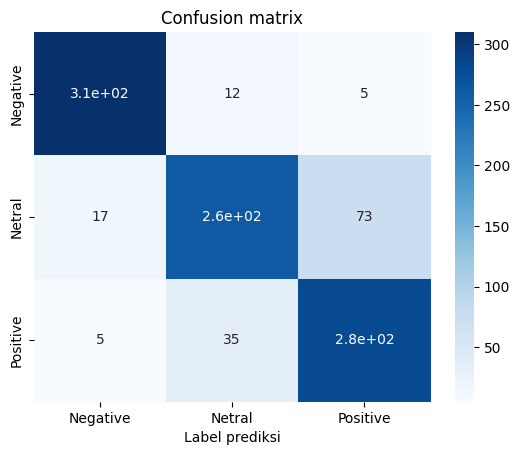

In [ ]:
t = time()
y_pred = model.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)
# Mengukur lama waktu prediksi model ke data test.

score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)
# Menghitung dan menampilkan akurasi prediksi model.

print(metrics.classification_report(y_test, y_pred, target_names=['Negative', 'Netral', 'Positive']))
# Menampilkan precision, recall, f1-score, dan support untuk masing-masing kelas kategori.

columns = ['Negative','Netral','Positive']

# Menghitung confusion matrix antara label aktual dan label prediksi
confm = confusion_matrix(y_test, y_pred)

# Mengubah hasil confusion matrix menjadi DataFrame agar lebih mudah divisualisasikan
df_cm = DataFrame(confm, index=columns, columns=columns)

# Membuat heatmap dari confusion matrix
ax = sn.heatmap(df_cm, cmap='Blues', annot=True)

# Menambahkan judul ke heatmap
ax.set_title('Confusion matrix')

# Menambahkan label pada sumbu x (kolom)
ax.set_xlabel('Label prediksi')

**Hasil**

Accuracy: 0.852 = Secara keseluruhan 85,2% prediksi model benar


**Confusion matrix**

1.   kelas negative
*   False Positive (FP): 22
*   False Negative (FN): 17
*   True Negative (TN): 646

2.   kelas netral
* True Positive (TP): 260
* False Positive (FP): 47
* False Negative (FN): 90
* True Negative (TN): 598

3. kelas positive
* True Positive (TP): 278
* False Positive (FP): 78
* False Negative (FN): 40
* True Negative (TN): 599



In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train,y_train, cv=10)

# Menampilkan akurasi dari tiap fold
print(scores)

# Menampilkan rata-rata akurasi dari semua fold
print(scores.mean())

[0.83919598 0.85175879 0.83919598 0.8718593  0.82663317 0.83165829
 0.84634761 0.86146096 0.85138539 0.85138539]
0.8470880852625848


**Naive bayes**

In [ ]:
from sklearn.model_selection import train_test_split

# Split Data Menjadi Data Latih dan Uji
x_train, x_test, y_train, y_test = train_test_split(X, y_res, test_size=0.2,
random_state=35)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Membuat model klasifikasi Naive Bayes dan melatihnya dengan data training
model = BernoulliNB().fit(x_train,y_train)

In [ ]:
# Prediksi
prediction = model.predict(x_test)

# Hasil prediksi diubah menjadi Series pandas agar lebih mudah dibaca
predict= pd.Series(prediction)

# Menampilkan hasil prediksi sebagai string
print(predict.to_string())

0      positif
1      positif
2      negatif
3      positif
4      positif
5       netral
6      negatif
7      negatif
8      negatif
9       netral
10     negatif
11     positif
12      netral
13     negatif
14     negatif
15     positif
16      netral
17      netral
18     negatif
19      netral
20     negatif
21     negatif
22      netral
23     negatif
24     positif
25     negatif
26     negatif
27     positif
28     positif
29     positif
30     negatif
31      netral
32     negatif
33      netral
34     negatif
35     negatif
36     positif
37     negatif
38      netral
39      netral
40     negatif
41     negatif
42     positif
43     negatif
44     positif
45     positif
46     positif
47     negatif
48     negatif
49     positif
50      netral
51     negatif
52      netral
53     positif
54      netral
55      netral
56      netral
57      netral
58      netral
59      netral
60      netral
61     negatif
62     negatif
63      netral
64      netral
65     negatif
66     pos

In [ ]:
true_label= pd.Series(y_test)
print(true_label.to_string())

34      positif
1004    positif
732     negatif
397     positif
1308     netral
3223     netral
3079     netral
1883     netral
3890    negatif
3242    positif
3555    negatif
4624    positif
1531     netral
3040    negatif
3168    negatif
4640    positif
2669     netral
2754     netral
69      negatif
3237     netral
2229     netral
2548    negatif
2371     netral
4559    negatif
553     positif
1993    negatif
4323    negatif
2345    positif
591     positif
4608    positif
3838    negatif
790      netral
3916    negatif
1180     netral
1637    negatif
2212    negatif
1853    positif
3589    negatif
2851     netral
361      netral
3869    negatif
4426    negatif
214     positif
1936    negatif
1802    positif
4594    positif
966      netral
2359     netral
1171    positif
922     positif
2373     netral
1165    negatif
2671     netral
1303    positif
646      netral
1216     netral
3374     netral
491      netral
421     positif
709      netral
3883    negatif
3570    negatif
3966    

In [ ]:
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pandas import DataFrame

test time:  0.092s
accuracy:   0.842
              precision    recall  f1-score   support

    Negative       0.86      0.92      0.89       327
      Netral       0.85      0.76      0.80       350
    Positive       0.82      0.85      0.84       318

    accuracy                           0.84       995
   macro avg       0.84      0.84      0.84       995
weighted avg       0.84      0.84      0.84       995



Text(0.5, 23.52222222222222, 'Label prediksi')

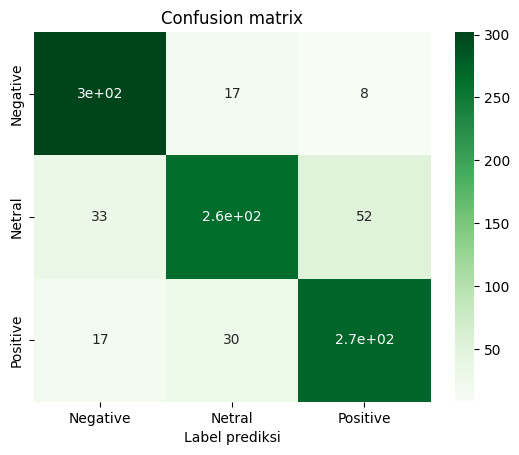

In [ ]:

t = time()

# Melakukan prediksi menggunakan model yang sudah dilatih
y_pred = model.predict(x_test)

# Mengukur waktu yang dibutuhkan untuk prediksi
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# Menghitung akurasi dari hasil prediksi terhadap data uji
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

# Menampilkan classification report yang berisi precision, recall, f1-score untuk tiap kelas
print(metrics.classification_report(y_test, y_pred, target_names=['Negative', 'Netral', 'Positive']))

# Menentukan label untuk masing-masing kolom dan baris confusion matrix
columns = ['Negative','Netral','Positive']

# Menghitung confusion matrix
confm = confusion_matrix(y_test, y_pred)

# Mengubah hasil confusion matrix menjadi dataframe agar mudah divisualisasikan
df_cm = DataFrame(confm, index=columns, columns=columns)

# Membuat visualisasi heatmap dari confusion matrix
ax = sn.heatmap(df_cm, cmap='Greens', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')

Akurasi model adalah 0.842 atau 84.2%, artinya dari seluruh data uji sekitar 84% prediksi model benar.

**Confusion matrix**
1. kelas negative
* True Positive (TP) = 302
* False Positive (FP) = 50
* False Negative (FN) = 25

2. kelas netral
* True Positive (TP) = 265
* False Positive (FP) = 47
* False Negative (FN) = 85

3. kelas positive
* True Positive (TP) = 271
* False Positive (FP) = 60
* False Negative (FN) = 47

In [ ]:
from sklearn.model_selection import cross_val_score

#cross validation
scores = cross_val_score(model, x_train,y_train, cv=10)

# Print the accuracy of each fold:

print(scores)

# Print the mean accuracy of all 10 folds

print(scores.mean())

[0.80653266 0.82663317 0.79899497 0.82663317 0.81658291 0.81155779
 0.84382872 0.81612091 0.83123426 0.88161209]
0.8259730643140134


**CV**
* rata-rata, model mampu mencapai akurasi sekitar 82.6% pada data latih setelah diuji berkali-kali lewat 10-fold cross validation
* Secara keseluruhan model stabil dan cukup konsisten